<img src="https://logosmarken.com/wp-content/uploads/2020/04/Amazon-Logo.png" alt="Beschreibung des Bildes" width="200" height="150">

# **Amazon Products Data Analysis 2023** 🔥

## **Introduction**

### **About Dataset**

- This is a Product Dataset scraped from the indian Amazon website in 2023
- Its product data are separated by 142 categories in csv format
- Each csv files consists of 10 columns and each row has products details accordingly
- The combined dataframe contains 1103170 entries in total


[Here's the link to the dataset](https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset)

 ### **Objectives**

 - Exüploration of structre amd characteristics of the dataset
- What are the most popular product categories and brands? Which categories are niche fields, and where might there be growth opportunities?
- What impact do prices, discounts, and the number of reviews have on the rating?
- Are there any other correlations between ratings and prices?
- At what prices are products offered in various categories and brands?
- What rating get products from various categories and brands?
- What insights can we gain about top brands and their rating and prices?

## **Preprocessing**
### **Get data**

In [113]:
# Import libraries
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import plotly.express as px
import os
import statsmodels.formula.api as smf # linear regression
from scipy import stats
%matplotlib inline

First, we load our data:

In [114]:
# path to the local folder where the CSV files are stored
path ="C:/Datasets/Amazon Product Sales Dataset 2023"

# List of all CSV files in the folder
all_files = os.listdir(path)

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Read data from each CSV file and combine into the combined_data DataFrame
for filename in all_files:
    if filename.endswith('.csv'):
        file_path = os.path.join(path, filename)
        data = pd.read_csv(file_path, low_memory=False)
        combined_df = pd.concat([combined_df, data], ignore_index=True)

### **Understand Data**
#### **Planning**

After loading the data, our initial step involves gaining a comprehensive understanding of the combined_df DataFrame. To achieve this, we perform the following actions:

1. **DataFrame Information**: We begin by examining crucial details such as data types and non-null counts using combined_df.info().

2. **Viewing Initial Data**: We display the initial rows of the DataFrame through combined_df.head(), allowing us to get a sense of the dataset's structure and content.

3. **Viewing End Data**: To complete our view, we also showcase the last rows of the DataFrame via combined_df.tail().

4. **Statistical Measures**: Employing combined_df.describe(), we calculate key statistical figures for numerical columns, which provide insights into the data's distribution.

5. **Data Dimensions***: We determine the size of our DataFrame by displaying the count of rows and columns with combined_df.shape.

6. **Handling Missing Values**: Lastly, we identify and quantify any missing values within the DataFrame using combined_df.isna().sum(). This step is critical for addressing data gaps and ensuring data quality.







#### **Overview**

Let´s begin and get an first overview of the dataset:

In [115]:
# Display main information and figures of the combined_df DataFrame
print("Overview main informations:", '\n')
display(combined_df.info())

Overview main informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(9)
memory usage: 84.2+ MB


None



- **Number of Entries**: As you see, the dataset contains a total of 1,103,170 entries (rows).
- **Columns**: There are ten columns in the dataset, each with a corresponding name.
- **Data Types**: All columns in the dataset have the data type "object." This suggests that these columns may contain a mixture of data types, including text (strings) and potentially numerical values represented as strings.
- **Non-Null Counts**: The "Non-Null Count" column indicates the number of non-missing (non-null) values in each column. For example, the columns ratings, no_of_ratings, discount_price, and actual_price have missing values because their non-null counts are less than the total number of entries.

Overall, this overview provides a snapshot of the dataset's structure, including the number of entries, column names, data types, and the presence of missing values in certain columns. To proceed with data analysis or visualization, it's essential to address missing values and potentially convert columns with numerical data stored as strings to their appropriate numerical data types.


Following that, let's examine both the initial and concluding rows of the DataFrame to gain insight into any additional tasks that may be required.

In [116]:
# Show first rows of the combined_df DataFrame
print('\n', 'First rows:')
display(combined_df.head())


 First rows:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",NaN



As a result, it can be observed that the brand name does not appear to be listed in a separate column, and the price columns contain a currency symbol (INR). We take care of that later.

#### **Missing Values**

Let´s also take a closer on the missing values:

In [117]:
# Show missing values in the combined_df DataFrame
print('\n', 'Missing values:')
display(combined_df.isna().sum())


 Missing values:


name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
Unnamed: 0        551585
dtype: int64

The summary of missing values indicates that the "name," "main_category," "sub_category," "image," and "link" columns have no missing values. However, there are a lot of missing values in the columns ratings, no_of_ratings_discount_price and Unnamed: 0.

These missing values will need to be addressed, either by imputing data where possible or by making decisions about how to handle them during the analysis. To handle missing values in your dataset, we have several options, depending on the nature of our data and our analysis goals.

## **Clean and Transform Data**
### **Unecessary Columns**

The "Unnamed: 0" column typically represents an index that was present in the DataFrame before it was exported to a CSV file or underwent other data manipulation. It often contains values that correspond to the original row indices of the DataFrame. However, this column doesn't usually provide any meaningful information and can be confusing as it's essentially a duplicate of the row index.

It doesn't add any additional information and can make the data view less clear. We remove them using the following code.

In [118]:
# Remove unwanted columns
combined_df.drop(columns=['Unnamed: 0'], inplace=True)
display(combined_df.head())

#display(combined_df.tail())
print(combined_df.shape)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


(1103170, 9)


### **Duplicates**
In the next step we delete all duplicate rows, to ensure that each row in the DataFrame represents unique and distinct data points.

In [119]:
# Drop duplicates
combined_df.drop_duplicates(inplace=True)

# Show columns and rows afterwards
print(combined_df.shape)

(569895, 9)


As we see, the dataframe now only has 569.895 rows left.

### **Currency Symbol**

As some columns contain currency symbols and thousand seperators, we have to to transform them to be in a suitable shape for further operations:

In [120]:
# List of columns that should be checked
float_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

# Remove '₹' currency symbol and replace thousand separators
for col in float_columns:
    combined_df[col] = combined_df[col].str.replace('₹', '', regex=False)
    combined_df[col] = combined_df[col].str.replace(',', '', regex=False)

# Display updated values in the specified columns
print(f"Updated values:")
display(combined_df.head())

Updated values:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999,58990
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490,75990
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490,61990
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990,68990
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490,67790


### **Missing Values**
#### **Overview**

In [121]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           194104
no_of_ratings     175857
discount_price     62194
actual_price       18074
dtype: int64
Count of columns and rows:
(569895, 9)


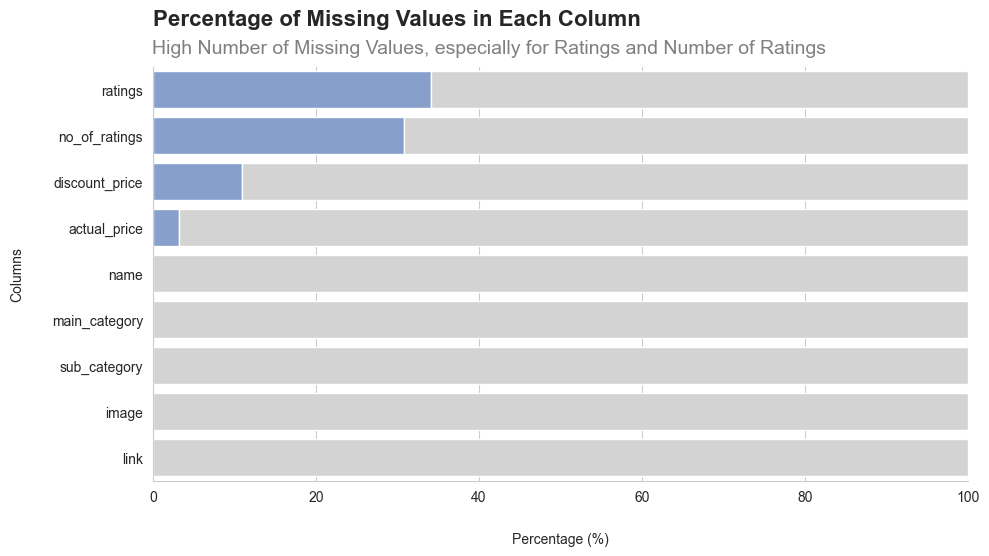

In [122]:
missing_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100
# Sort the series in descending order
sorted_columns = missing_percentage.sort_values(ascending=False).index
sorted_missing_percentage = missing_percentage.sort_values(ascending=False).values

# Calculate the percentage of available values in each column for the sorted data
available_percentage_sorted = 100 - sorted_missing_percentage

# Create a horizontal 100% stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the barplot with sorted missing values in blue
ax = sns.barplot(x=sorted_missing_percentage, y=sorted_columns, color='#6495ED', saturation=0.5)

# Overlay the sorted available values in lightgray, starting where the sorted missing values bar ends
ax = sns.barplot(x=available_percentage_sorted, y=sorted_columns, color='lightgray', saturation=0.5, left=sorted_missing_percentage)

# Set plot title and labels
plt.title("Percentage of Missing Values in Each Column", loc='left', pad=30, fontweight='bold', fontsize=16)
# Add a subtitle
plt.suptitle('High Number of Missing Values, especially for Ratings and Number of Ratings', fontsize=14, color='grey', ha='left', x=0.157, y=0.87)

plt.xlabel("Percentage (%)", labelpad=20)
plt.ylabel("Columns", labelpad=20)

# Set x-axis limits to 0-100
plt.xlim(0, 100)

# Remove top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


- **Ratings:** This column has 194,104 missing values, implying that a significant portion of products has no ratings provided.
- **Number of Ratings:** This column has 175,857 missing values, indicating that there is no count of ratings available for many products.
- **Discount Price:**" This column contains 62,194 missing values, suggesting that not every product has a specified discount price.
- **Actual Price:** This column has 18,074 missing values, meaning that there is no listed original price available for some products.

It is important to note that the presence of missing values in the "ratings," "no_of_ratings," "discount_price," and "actual_price" columns may indicate that not all products have been reviewed or have discounts. This could potentially impact future analyses, and consideration should be given to how missing values will be handled if they play a role in the analysis.

#### **Ratings and Number of Ratings**

1. **Definining relevant columns:** We start by defining a list of relevant columns named "relevant_columns." These columns include 'ratings,' 'no_of_ratings,' 'actual_price,' and 'discount_price.' These columns are considered relevant for our analysis, likely because they contain important information about the products.

2. **Filtering Rows with Missing Values**: We then filter rows from the DataFrame where at least three missing values are present in the relevant columns. This is achieved using the isna().sum(axis=1) method, which calculates the number of missing values in each row within the specified relevant columns. Rows with three or more missing values in these columns are retained, while others are filtered out.

3. **Counting Filtered Rows**: We calculate the number of rows that meet the criteria of having at least three missing values in the relevant columns and store this count in the variable "num_rows_with_missing_values."

4. **Displaying Filtered Rows**: Finally, we display a subset of the rows that meet the criteria using the head() and tail() functions. This allows us to examine the filtered rows and better understand which data points are missing and why.

In [123]:
# Define the list of relevant columns
relevant_columns = ['ratings', 'no_of_ratings', 'actual_price', 'discount_price']

# Filter rows with at least 3 missing values in relevant columns
rows_with_missing_values = combined_df[combined_df[relevant_columns].isna().sum(axis=1) >= 3]

# Count the number of rows
num_rows_with_missing_values = rows_with_missing_values.shape[0]
print(f"Number of rows with at least 3 missing values in relevant columns: {num_rows_with_missing_values}")

# Display the filtered rows
display(rows_with_missing_values.head())
#display(rows_with_missing_values.tail())

Number of rows with at least 3 missing values in relevant columns: 26321


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
170,Blue Star 2 Tr 3 Star Fixed Speed Split AC (Co...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/21WQrs98j1...,https://www.amazon.in/Blue-Star-Fixed-Copper-F...,NaN,NaN,NaN,NaN
212,"FANCISUN Portable Air Conditioner,Personal Air...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51xoVYg8ba...,https://www.amazon.in/FANCISUN-Portable-Condit...,NaN,NaN,NaN,8980
228,"Voltas Adjustable Inverter AC, 1.5 Ton, 3 Star...",appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Voltas-Adjustable-Invert...,NaN,NaN,NaN,NaN
238,Carrier Emperia CXI Wifi 1.5 Ton 5 Star Invert...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Carrier-Emperia-CXI-Cond...,NaN,NaN,NaN,NaN
262,OGeneral 1.8 Ton 4 Star Inverter Split AC (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OGeneral-Inverter-Copper...,NaN,NaN,NaN,NaN


By filtering out rows with at least three missing values in the specified relevant columns, we are likely aiming to clean the dataset and ensure that the data used for analysis is reliable and informative. Rows with multiple missing values may not provide meaningful insights, and removing them, improves the quality of subsequent analyses.

In [124]:
# Define the list of relevant columns
relevant_columns = ['ratings', 'no_of_ratings', 'actual_price', 'discount_price']

# Count the number of NaN values in each row for the relevant columns
combined_df['nan_count'] = combined_df[relevant_columns].isna().sum(axis=1)

# Filter rows where at least 3 of the specified columns have NaN values
combined_df = combined_df[combined_df['nan_count'] < 3]

# Drop the 'nan_count' column as it's no longer needed
combined_df = combined_df.drop(columns=['nan_count'])


In [125]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           167783
no_of_ratings     149790
discount_price     35873
actual_price        6761
dtype: int64
Count of columns and rows:
(543574, 9)


In [126]:
# Identify the number of rows that meet the condition
filtered_rows = combined_df[(combined_df['no_of_ratings'].isna()) & (combined_df['ratings'].isna())]
num_rows_matching_condition = len(filtered_rows)

# Define the desired sample size (e.g., 10 rows)
sample_size = 10

# Draw a random sample of rows
if num_rows_matching_condition >= sample_size:
    random_sample = filtered_rows.sample(n=sample_size, random_state=42)
else:
    random_sample = filtered_rows.sample(n=num_rows_matching_condition, random_state=42)

# Display the random sample
display(random_sample.head())

# Sample check on Amazon-Website
# sample 1: currently unavailable, no ratings
# sample 2: currently unavailable, no ratings
# sample 3: no ratings
# sample 4: only one rating in septembre 2023
# sample 5: only three ratings septembre 2023
# sample 6: no ratings
# sample 7: no ratings
# sample 8: 16 ratings, first ratings from June 2023
# sample 9: only two ratings in septembre 2023
# sample 10: no ratings

## --> Reason for NaN-Values is , that products had no ratings. Therefore substitution by zero

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
433457,TAS fashion Small 10 L Backpack PU Leather Sty...,kids' fashion,School Bags,https://m.media-amazon.com/images/I/51C6UG5aRy...,https://www.amazon.in/fashion-Backpack-Leather...,NaN,NaN,343,499
495147,Fashion icon-Running Sport Shoes for Men's and...,men's shoes,Sports Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Fashion-icon-Running-Spo...,NaN,NaN,1300,1750
357674,Skyuni Collection Red & Black Silicone Wrist B...,accessories,Jewellery,https://m.media-amazon.com/images/I/61FAKVIHoS...,https://www.amazon.in/Skyuni-Collection-Silico...,NaN,NaN,234,299
528329,Bombey Scientific Alcohol Hydrometer For Alcoh...,industrial supplies,"Test, Measure & Inspect",https://m.media-amazon.com/images/I/41b8aGr1a-...,https://www.amazon.in/Bombey-Scientific-Hydrom...,NaN,NaN,899,1299
8122,Naklang- Power-free Hand Blender and Beater wi...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Naklang-Power-free-Blend...,NaN,NaN,189,339


In [127]:
# Remove rows with NaN values in either the "ratings" or "no_of_ratings" columns
#combined_df = combined_df.dropna(subset=['ratings', 'no_of_ratings'], how='any')

# Create a mask for rows where both 'ratings' and 'no_of_ratings' have NaN values
mask = combined_df['ratings'].isnull() & combined_df['no_of_ratings'].isnull()

# Replace NaN values with 0 in 'ratings' and 'no_of_ratings' columns in selected rows
combined_df.loc[mask, 'ratings'] = 0
combined_df.loc[mask, 'no_of_ratings'] = 0


#### **Actual Price and Discount Price**

In the following cells, we are removing all rows where both 'discount_price' and 'actual_price' are missing, as they are not conducive to our analysis. This action results in the removal of 6761 rows, which does not significantly diminish our overall dataframe. An alternative would be to impute missing 'discount_price' values using the median discount percentage of other products. However, this approach may introduce bias, as it assumes that the missing values should have a discount similar to the median of available data. This assumption might not always hold true, and it could distort the analysis.

In [128]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price    35873
actual_price       6761
dtype: int64
Count of columns and rows:
(543574, 9)


In [129]:
# Select rows where both 'discount_price' and 'actual_price' columns have missing values (NaN)
nan_both_columns = combined_df[combined_df['discount_price'].isna() & combined_df['actual_price'].isna()]

# Count the number of rows with NaN values in both columns
count_nan_both_columns = len(nan_both_columns)

# Print the count of rows with NaN values in both columns
print("Number of rows with NaN values in both columns:", count_nan_both_columns)

# Remove rows where both 'discount_price' and 'actual_price' columns have missing values (NaN)
combined_df = combined_df.dropna(subset=['discount_price', 'actual_price'], how='all')

# Print count of rows after removal
print("Number of rows after removal", combined_df.shape)


Number of rows with NaN values in both columns: 6761
Number of rows after removal (536813, 9)


In [130]:
combined_df.isna().sum()

name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price    29112
actual_price          0
dtype: int64

Not all products on Amazon have a discount price. Whether a product has a discount price or not depends on various factors, including the selling price of the product, the seller, and current offers or promotions on the Amazon platform. A discount price is usually displayed when a product is sold at a lower price than the original list price. This can happen in various ways, such as through limited-time special offers, lightning deals, coupons, or discount promotions by sellers. It is also possible that some products inherently do not have a discount because they may already be offered at a competitive price or are exclusive or premium products.

Overall, the availability of discount prices depends on the specific product category, the seller's selling strategy, and the current market conditions.

For this reason, in the next step, we will replace these NaN values with the current value, as we assume that there is no discount and no data could be retrieved by web scraping because there was no discount price available.  This assumption is based on the understanding that not all products have discounts, as explained in the text above.

In [131]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price    29112
actual_price          0
dtype: int64
Count of columns and rows:
(536813, 9)


In [132]:
# Display the first rows containing NaN values in the "discount_price" column
nan_discount_price_rows = combined_df[combined_df['discount_price'].isna()]
display(nan_discount_price_rows.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
126,"Hitachi 1.5 Ton 5 Star Window AC (Copper, Dust...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/81Ei0pUgd7...,https://www.amazon.in/Hitachi-Window-Copper-Fi...,2.7,10,NaN,49300
137,"Portable Air Conditioner,Office Air Conditione...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61zHq-twHL...,https://www.amazon.in/Portable-Conditioner-Eva...,3.2,303,NaN,7250
207,Voltas 1.5 Ton 3 Star Window AC (Copper 183CYA...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71VOrlTj3M...,https://www.amazon.in/Voltas-Window-183CYA-183...,4.1,1832,NaN,31750
213,"BENBOAR Portable Air Conditioner Fan, Desktop ...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71TqRhNY1y...,https://www.amazon.in/BENBOAR-Conditioner-Evap...,3.3,24,NaN,4969
237,Ontel Arctic Air Freedom Portable Personal Air...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Ontel-Arctic-Freedom-Por...,3.8,9577,NaN,5065


In [133]:
# Replace NaN values in 'discount_price' with values from 'actual_price'
combined_df['discount_price'].fillna(combined_df['actual_price'], inplace=True)

In [134]:
combined_df.isna().sum()

name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price        0
actual_price          0
dtype: int64

### **Non-numeric Columns**
Ratings, number of ratings and the price columns should be float, therefore it is necessary to transform them for further analysis.

In [135]:
# List of columns that should be checked
float_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

# Display unique non-numeric values for each column
for col in float_columns:
    non_numeric_values = combined_df[col][pd.to_numeric(combined_df[col], errors='coerce').isna()].unique()
    if non_numeric_values.size > 0:
        print(f"Unique non-numeric values in column '{col}':")
        print(non_numeric_values)
        print("=" * 40)

Unique non-numeric values in column 'ratings':
['Get' 'FREE' nan]
Unique non-numeric values in column 'no_of_ratings':
['Only 2 left in stock.' 'Only 1 left in stock.' 'FREE Delivery by Amazon'
 'Usually dispatched in 2 to 3 days.' 'Usually dispatched in 5 to 6 days.'
 'Usually dispatched in 4 to 5 days.' 'Usually dispatched in 6 to 7 days.'
 'Usually dispatched in 7 to 8 days.' 'Only 3 left in stock.'
 'Usually dispatched in 3 to 4 weeks.'
 'Usually dispatched in 4 to 5 weeks.' 'Only 5 left in stock.'
 'Only 4 left in stock.' 'Usually dispatched in 3 to 5 days.'
 'Usually dispatched in 11 to 12 days.'
 'Usually dispatched in 9 to 10 days.'
 'Usually dispatched in 2 to 3 weeks.'
 'Usually dispatched in 8 to 9 days.'
 'Usually dispatched in 1 to 2 months.'
 'This item will be released on August 14 2023.']


In [136]:
# Count occurrences of specific non-numeric values in the 'ratings' column
ratings_non_numeric_values = combined_df['ratings'][pd.to_numeric(combined_df['ratings'], errors='coerce').isna()]
non_numeric_counts = ratings_non_numeric_values.value_counts()

In [137]:
# Print name of non-numeric values
print("Non-numeric values in column 'no_of_ratings':")
print(non_numeric_values)

# Print the counts of specific non-numeric values
non_numeric_counts = ratings_non_numeric_values.value_counts()
print("Counts of specific non-numeric values in column 'no_of_ratings':")
print(non_numeric_counts)


Non-numeric values in column 'no_of_ratings':
[]
Counts of specific non-numeric values in column 'no_of_ratings':
Get     4852
FREE    1357
Name: ratings, dtype: int64


In [138]:
# Count occurrences of specific non-numeric values in the 'ratings' column
no_ratings_non_numeric_values = combined_df['no_of_ratings'][pd.to_numeric(combined_df['no_of_ratings'], errors='coerce').isna()]
non_numeric_counts = no_ratings_non_numeric_values.value_counts()

print("Counts of specific non-numeric values in column 'Number of ratings':")
print(non_numeric_counts)

Counts of specific non-numeric values in column 'Number of ratings':
FREE Delivery by Amazon                          3296
Only 1 left in stock.                            1050
Usually dispatched in 3 to 4 weeks.               847
Only 2 left in stock.                             562
Usually dispatched in 4 to 5 days.                190
Usually dispatched in 5 to 6 days.                 70
Usually dispatched in 6 to 7 days.                 45
Usually dispatched in 7 to 8 days.                 42
Only 3 left in stock.                              34
Only 5 left in stock.                              29
Only 4 left in stock.                              22
Usually dispatched in 11 to 12 days.               17
Usually dispatched in 2 to 3 weeks.                 8
Usually dispatched in 4 to 5 weeks.                 8
Usually dispatched in 2 to 3 days.                  6
Usually dispatched in 3 to 5 days.                  3
Usually dispatched in 9 to 10 days.                 1
Usually dispa

In [139]:
# Define a boolean mask to keep only rows with numeric values and NaNs in 'no_of_ratings' column
numeric_mask = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce').notna()

# Apply the boolean mask to filter the rows
combined_df = combined_df[numeric_mask]

print(combined_df.shape)
print(combined_df.isna().sum())

(530580, 9)
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price        0
actual_price          0
dtype: int64


In [140]:
# Calculate the median for the 'ratings' column for each 'sub_category'
median_ratings_by_subcategory = combined_df.groupby('sub_category')['ratings'].median()

# Replace NaN values in the 'ratings' column with the corresponding median for the 'sub_category'
combined_df['ratings'] = combined_df.apply(lambda row: median_ratings_by_subcategory[row['sub_category']] 
                                           if pd.isna(row['ratings']) else row['ratings'], axis=1)


In [141]:
combined_df.isna().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

### **Set Datatypes**
In the next step we change the data types of specific columns in the dataframe. This is done for several reasons:

1. **Consistency and Space**: The code ensures that data in the DataFrame is stored consistently. For instance, columns like "ratings" and "no_of_ratings" are stored as floating-point numbers instead of integers, saving storage space.

2. **Accuracy in Analysis**: Correct data types are essential to ensure that analytical calculations and visualizations yield accurate results. Different data types can lead to different outcomes.

3. **Efficient Visualization**: Using the right data types enables efficient data representation in charts and graphs.

The code employs a dictionary (conversion_dict) to specify the desired data types for particular columns, and then applies these data types to the DataFrame. This ensures that the data is in a suitable format for performing analyses and visualizations.

In [142]:
# Dictionary mapping column names to their desired data types
conversion_dict = {
    'name': 'category',
    'main_category': 'category',
    'sub_category': 'category',
    'ratings': float,
    'no_of_ratings': float,
    'discount_price': float,
    'actual_price': float
}

# Convert columns to specified data types
combined_df = combined_df.astype(conversion_dict)

# Set the option to display floating-point numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Display updated data types after conversion
print("Data types after conversion:")
print(combined_df.dtypes)

Data types after conversion:
name              category
main_category     category
sub_category      category
image               object
link                object
ratings            float64
no_of_ratings      float64
discount_price     float64
actual_price       float64
dtype: object


### **Extracting Brand Names**

In the following steps, we are extracting the brand names from the "name" column and creating a new column called "brand" in the dataframe. This is important for further data analysis, because it allows us to categorize and group products based on their brand, enabling us to gain insights into brand-related trends, comparisons, and patterns within the dataset. The extracted brand information will be useful for performing brand-specific analysis and understanding the distribution and characteristics of products offered by different brands.

In [143]:
def extract_brand(name):
    # List of special starting words that require extracting the next word as well
    special_starts = ["The", "Van", "U.S.", "Men's", "PC"]
    
    # Splitting the name into words
    words = name.split()
    
    # Check if the first word is special and requires the next word to be included
    if words[0] in special_starts and len(words) > 1:
        return words[0] + ' ' + words[1]  # Return the first two words
    else:
        return words[0]  # Return only the first word

# Apply the function to the 'name' column to create the 'brand' column
combined_df['brand'] = combined_df['name'].apply(extract_brand)

# Display the first few rows of the DataFrame with the new 'brand' column
display(combined_df.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.20,2255.00,32999.00,58990.00,Lloyd
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.20,2948.00,46490.00,75990.00,LG
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.20,1206.00,34490.00,61990.00,LG
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.00,69.00,37990.00,68990.00,LG
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.10,630.00,34490.00,67790.00,Carrier


### **Currency Translation**
In the following step, we are converting prices from Indian Rupees (INR) to Euros (EUR) using the provided exchange rate. We sourced the exchange rate from the German Federal Statistical Office (DeStatis) and utilized the exchange rate for March 2023. This choice was made due to the dataset's availability at that specific time. The exchange rate was set at 1 EUR = 88.1159 INR. By applying this exchange rate, we introduced a new level of consistency and accuracy to the dataset's pricing information. This conversion process involved creating new columns, namely "actual_price_eur" and "discount_price_eur," which represent the converted values in Euros. To ensure neatness and uniformity, these converted values were rounded to two decimal places. This preprocessing step is pivotal in ensuring that subsequent data analysis is carried out with precision, allowing us to uncover meaningful insights and trends in the dataset.

In [144]:
# Exchange rate for March 2023: 1 EUR = 88.1159 INR
exchange_rate = 88.1159

# Add new column with converted values in Euros
combined_df["actual_price_eur"] = combined_df["actual_price"] / exchange_rate
combined_df["discount_price_eur"] = combined_df["discount_price"] / exchange_rate

# Round the converted values to 2 decimal places
combined_df["actual_price_eur"] = combined_df["actual_price_eur"].round(2)
combined_df["discount_price_eur"] = combined_df["discount_price_eur"].round(2)

# Display the updated DataFrame
display(combined_df.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.20,2255.00,32999.00,58990.00,Lloyd,669.46,374.50
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.20,2948.00,46490.00,75990.00,LG,862.39,527.60
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.20,1206.00,34490.00,61990.00,LG,703.51,391.42
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.00,69.00,37990.00,68990.00,LG,782.95,431.14
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.10,630.00,34490.00,67790.00,Carrier,769.33,391.42


By dropping the unnecessary columns, we are simplifying the dataset and potentially improving the efficiency of subsequent analyses and operations that will be performed on the cleaned data.

### **Add a Column Discount Percentage**
We add a column with the discount percentage, as it might be better for interpretation as discount_price_eur, especially in furhter data analysis operations.

In [145]:
# Calculate the discount percentage without decimal places and create a new column
combined_df['discount_percentage'] = ((combined_df['actual_price_eur'] - combined_df['discount_price_eur']) / combined_df['actual_price_eur']) * 100
combined_df['discount_percentage'] = combined_df['discount_percentage'].astype(float)

# Round the calculated values to 2 decimal places
combined_df["discount_percentage"] = combined_df["discount_percentage"].round(2)

# Set discount_percentage to 0 where actual_price_eur is 0
combined_df.loc[combined_df['actual_price_eur'] == 0, 'discount_percentage'] = 0

# Show first rows
combined_df.head()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.20,2255.00,32999.00,58990.00,Lloyd,669.46,374.50,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.20,2948.00,46490.00,75990.00,LG,862.39,527.60,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.20,1206.00,34490.00,61990.00,LG,703.51,391.42,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.00,69.00,37990.00,68990.00,LG,782.95,431.14,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.10,630.00,34490.00,67790.00,Carrier,769.33,391.42,49.12


### **Outliers and Unplausible Values**
#### **Rating and Number of Ratings**

In Amazon, buyers can rate products in two different ways. Either they provide a rating between 1 and 5 stars without any text, or they rate the product and also write a text review. It would be implausible, therefore, if there are reviews for a product but the rating is 0, as the rating scale starts at 1.

In [146]:
# Filter rows where 'no_of_ratings' is greater than 0 and 'ratings' is equal to 0
filtered_rows = combined_df[(combined_df['no_of_ratings'] > 0) & (combined_df['ratings'] == 0)]

# Display first rows
display(filtered_rows.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur,discount_percentage
1052363,global desi Women's Regular Fit Top,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/global-desi-Womens-Regul...,0.00,73.00,424.00,1699.00,global,19.28,4.81,75.05
1052364,uppercase Medium 23 Ltrs Tall Boy (14.6 inch) ...,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/POLICE-ltrs-cms-backpack...,0.00,184.00,1700.00,2300.00,uppercase,26.10,19.29,26.09
1052365,DailyObjects Skinny Fit Card Wallet,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/DailyObjects-Ballistic-S...,0.00,428.00,325.00,499.00,DailyObjects,5.66,3.69,34.81
1052366,Taruna Biyani® Multi-Color Semi Precious Gemst...,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Taruna-Biyani-Multi-Colo...,0.00,1.00,599.00,2800.00,Taruna,31.78,6.80,78.60
1052367,ZIYAA Women's Synthetic Straight Kurta,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Ziyaa-Womens-Straight-Ku...,0.00,6387.00,323.00,1107.00,ZIYAA,12.56,3.67,70.78


Let´s drop all rows with unplausible values:

In [147]:
# Remove the rows that meet the conditions
combined_df.drop(filtered_rows.index, inplace=True)
print(combined_df.shape)

(529976, 13)


#### **Summary Statistics**

Let's now take a closer look at the outliers, as they can significantly impact our analysis.

In [148]:
# Display statistics
summary = combined_df.describe()
display(summary)

,ratings,no_of_ratings,discount_price,actual_price,actual_price_eur,discount_price_eur,discount_percentage
count,529976.00,529976.00,529976.00,529976.00,529976.00,529976.00,529976.00
mean,2.74,582.28,2704.25,23113.81,262.31,30.69,47.09
std,1.83,7163.37,9420.76,13599262.47,154333.81,106.91,23.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,396.00,997.00,11.31,4.49,30.90
50%,3.60,6.00,689.00,1599.00,18.15,7.82,50.07
75%,4.10,59.00,1445.00,2999.00,34.03,16.40,65.45
max,5.00,589547.00,1249990.00,9899999999.00,112352027.26,14185.75,100.00


The summary statistics of the dataset reveal several key insights:

1. **Ratings Distribution**: The average rating is approximately 2.74 on a scale of 0 to 5, with a standard deviation of 1.83. Most products have ratings between 3 and 4.

2.  **Number of Ratings**: The number of ratings per product varies significantly, with an average of approximately 582. Some products have no ratings, while others have hundreds of thousands.

3. **Price Information**: Both discount prices and actual prices have a wide range. Some products have no discount, while others have significant discounts. Actual prices vary greatly, with a substantial standard deviation, and there seems to be products with exceptionally high prices.

4. **Discount Percentage**: The average discount percentage is around 47%, but it varies widely. Some products offer no discount, while others have substantial discounts.

5. **Outliers**: Several columns, especially 'no_of_ratings' and 'actual_price,' contain outliers, as indicated by the large standard deviations and maximum values.

These insights suggest that the dataset contains a mix of products with varying ratings, prices, and discounts. Careful consideration is needed when dealing with outliers, especially in 'actual_price,' which has extremely high values. Additionally, products with an extremly high number of ratings may require further investigation.


Let´s take a look at the number of ratings at first:

#### **Number of Ratings**

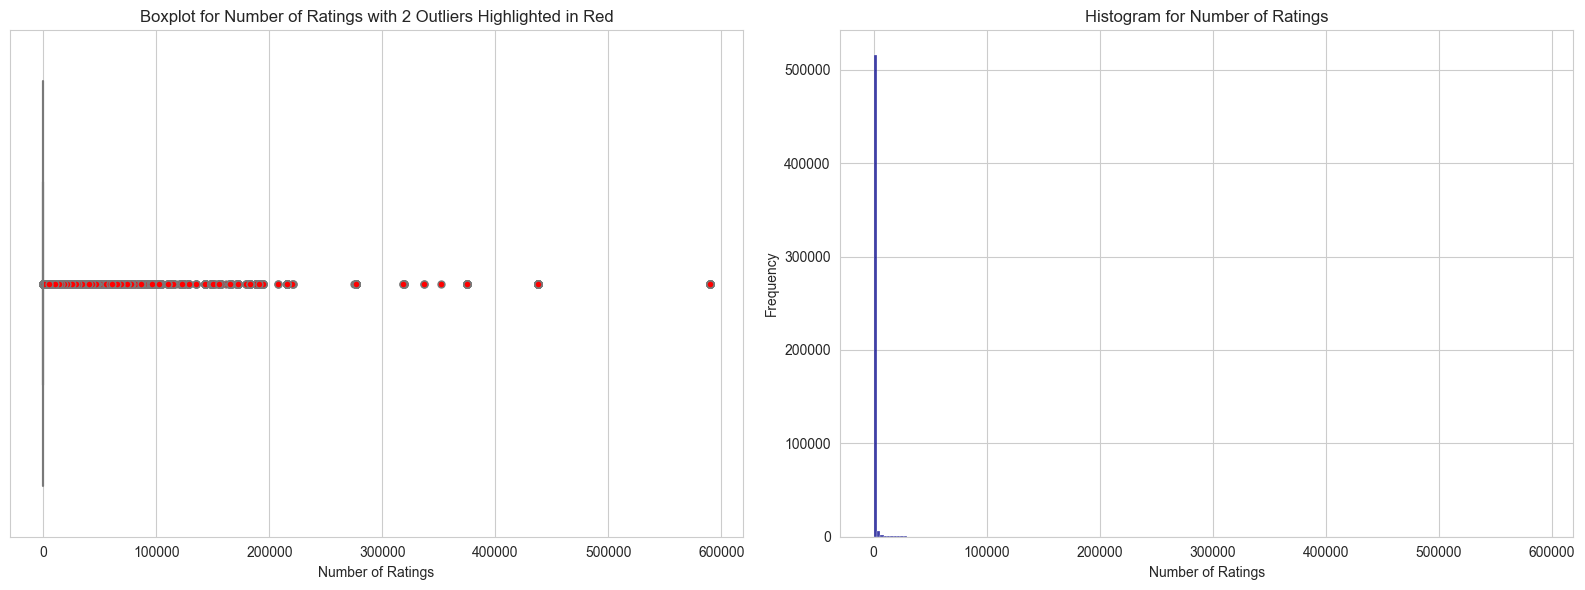

In [149]:
# Convert 'no_of_ratings' column to numeric
combined_df['no_of_ratings'] = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['no_of_ratings'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_title(f'Boxplot for Number of Ratings with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='no_of_ratings', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Number of Ratings')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


The displayed records are outliers with extremely high values in the "no_of_ratings" column. These outliers are SanDisk products in the Camera Accessories category, all having the same number of ratings (589,547). It is unusual for all these products to have precisely the same number of ratings, suggesting some anomaly or data error.

The "actual_price_eur" and "discount_price_eur" columns also show varying values for these products, indicating actual price differences among them. These outliers may represent products that are somehow unique or special, but without further information, it is challenging to explain why they all have the same number of ratings.

These outlier products likely represent instances where Amazon has aggregated ratings and reviews for various versions or capacities of the same product, such as memory cards with different storage capacities (128GB, 16GB, 64GB, etc.). Amazon often consolidates reviews for similar items under a single product listing, especially when the products are identical or nearly identical in terms of functionality and brand. Customers can then leave reviews and ratings for all variations of the product on a single page.

In this case, it's essential to recognize that these outliers are not typical individual products but rather a collection of similar products grouped together by Amazon. While this aggregation can lead to anomalous data entries, it's a common practice on e-commerce platforms to streamline reviews and ratings for the convenience of customers.

When conducting data analysis or modeling, it's crucial to decide whether to treat these aggregated products as individual entities or group them for analysis, depending on the specific research goals and questions. If necessary, we can filter, group, or transform the data to align with our analysis objectives.

To decide how to handle them let us take a more detailed look on the most extreme values:

In [150]:
# Drop columns that are not relevant for analysis from the DataFrame
combined_df.drop(["actual_price", "discount_price", "image", "link"], axis=1, inplace=True)

# Select rows with the highest values in the "no_of_ratings" column
top_high_ratings = combined_df.nlargest(5, 'no_of_ratings')

# Display these selected rows
display(top_high_ratings)


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
89489,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,45.38,19.35,57.36
89669,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,5.67,5.62,0.88
89823,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,11.35,8.51,25.02
90090,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,7.94,5.94,25.19
91265,SanDisk 256GB Class 10 MicroSD Card with Adapt...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,90.78,37.72,58.45


In [151]:
# Create a condition to identify rows that are duplicates based on specific columns
duplicate_condition = (
    (combined_df['ratings'] != 0) &             # Ratings are not zero
    (combined_df['no_of_ratings'] != 0) &       # Number of ratings is not zero
    combined_df.duplicated(subset=['ratings', 'no_of_ratings', 'brand', "actual_price_eur"], keep=False)  # Check for duplicates
)

# Get the indices of rows that meet the duplicate condition
duplicate_indices = combined_df.index[duplicate_condition].tolist()

# Display the first 10 indices of rows that are duplicates
print("First 10 duplicate indices:")
print(duplicate_indices[:10])

# Display the first 5 and last 5 rows of the DataFrame corresponding to these duplicate indices
display(combined_df.loc[duplicate_indices[:5]])
#display(combined_df.loc[duplicate_indices[-5:]])


First 10 duplicate indices:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.20,1206.00,LG,703.51,391.42,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.00,69.00,LG,782.95,431.14,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.10,630.00,Carrier,769.33,391.42,49.12


In [152]:
# Filter rows
filtered_rows = combined_df[
    (combined_df['ratings'] == 4.30) & 
    (combined_df['brand'] == 'MOTHER') & 
    (combined_df['no_of_ratings'] == 6370.00) & 
    (combined_df['sub_category'] == 'Value Bazaar') &
    (combined_df['actual_price_eur'] == 9.65)
]

# Display the filtered rows that meet the specified criteria
display(filtered_rows)

,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
535328,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10
1058161,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10


In [153]:
# Remove all duplicates from the DataFrame
combined_df = combined_df.drop_duplicates()

# Display the DataFrame after removing duplicates
print(combined_df.shape)


(497775, 9)


In [154]:
# Display the filtered rows that meet the specified criteria
display(filtered_rows)

,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
535328,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10
1058161,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10


In [155]:
# Create a condition to identify rows that are duplicates based on specific columns
duplicate_condition = (
    (combined_df['ratings'] != 0) &             # Ratings are not zero
    (combined_df['no_of_ratings'] != 0) &       # Number of ratings is not zero
    combined_df.duplicated(subset=['ratings', 'no_of_ratings', 'brand', "actual_price_eur", "name", 'main_category', 'discount_price_eur'], keep=False)  # Check for duplicates
)

# Get the indices of rows that meet the duplicate condition
duplicate_indices = combined_df.index[duplicate_condition].tolist()

# Display the first 10 indices of rows that are duplicates
print("First 10 duplicate indices:")
print(duplicate_indices[:10])

# Display the first 5 and last 5 rows of the DataFrame corresponding to these duplicate indices
display(combined_df.loc[duplicate_indices[:5]])
display(combined_df.loc[duplicate_indices[-5:]])

# Count the number of rows with duplicates
num_duplicates = len(duplicate_indices)

# Display the number of rows with duplicates
print("Number of rows with duplicates:", num_duplicates)


First 10 duplicate indices:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.20,1206.00,LG,703.51,391.42,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.00,69.00,LG,782.95,431.14,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.10,630.00,Carrier,769.33,391.42,49.12


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
579552,ADBUCKS Winter Wear Jacket Inside Full Black &...,sports & fitness,Yoga,3.80,211.00,ADBUCKS,22.69,10.54,53.55
579649,Men Cycling Underwear Shorts Breathable Gel Pa...,sports & fitness,Yoga,4.70,3.00,Men,62.41,30.97,50.38
579657,Adidas Regular Fit Women's Tees,sports & fitness,Yoga,3.50,9.00,Adidas,18.15,14.51,20.06
579660,"JUST RIDER Cotton Made Brief Shape, Athletic C...",sports & fitness,Yoga,4.40,3.00,JUST,2.49,2.49,0.00
579732,PROIRON NBR Yoga Mat 1830×660×10 mm - PURPLE P...,sports & fitness,Yoga,4.50,2230.00,PROIRON,42.27,28.09,33.55


Number of rows with duplicates: 78843


In [156]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497775 entries, 0 to 1058164
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 497775 non-null  category
 1   main_category        497775 non-null  category
 2   sub_category         497775 non-null  category
 3   ratings              497775 non-null  float64 
 4   no_of_ratings        497775 non-null  float64 
 5   brand                497775 non-null  object  
 6   actual_price_eur     497775 non-null  float64 
 7   discount_price_eur   497775 non-null  float64 
 8   discount_percentage  497775 non-null  float64 
dtypes: category(3), float64(5), object(1)
memory usage: 56.4+ MB


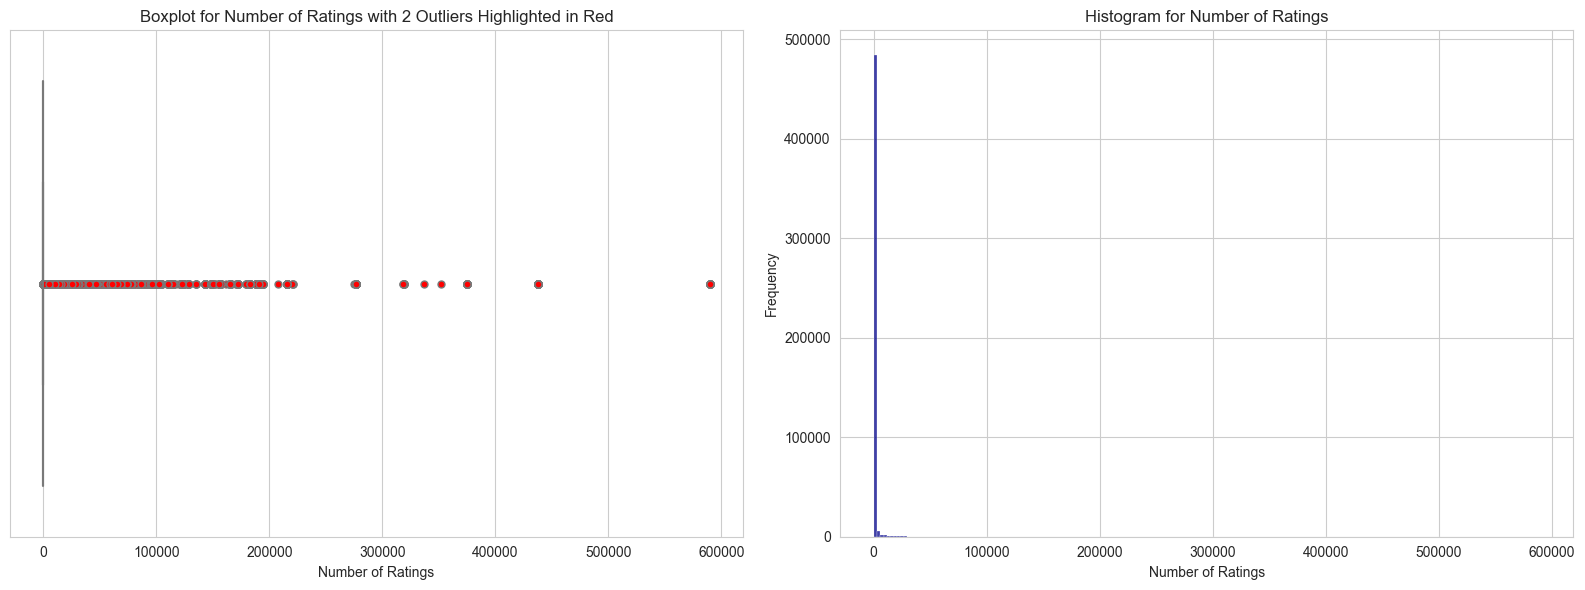

In [157]:
# Convert 'no_of_ratings' column to numeric
combined_df['no_of_ratings'] = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['no_of_ratings'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_title(f'Boxplot for Number of Ratings with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='no_of_ratings', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Number of Ratings')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

**Boxplot Observations:**

- **Outliers:** There are several points that stand out as outliers, with two of them highlighted in red. These are significantly higher than the rest, indicating that a few products have an unusually high number of ratings.
- **Median and Quartiles:** The boxplot likely shows a median that is very low relative to the range of data, given the concentration of data points near zero. This is consistent with the median of 6 you mentioned earlier. The interquartile range (IQR) is also very narrow, suggesting that the majority of products have a similar, low count of ratings.
- **Data Spread:** The spread of the data is extremely skewed to the right, with outliers pulling the mean upward.

**Histogram Observations:**

- **Skewness:** The histogram confirms that the distribution of the number of ratings is highly right-skewed. This means there are a few products with a very high number of ratings, while the vast majority have few ratings.
- **Frequency:** The highest frequency is at the very beginning of the scale, indicating that most products have a number of ratings close to zero.

**Combined Insights:**

- These visualizations support the initial summary of the descriptive statistics, showing a large variance in how often products are rated and confirming the presence of outliers.
- The vast majority of products have very few ratings, as shown by the concentration of data at the lower end of the scale in both the boxplot and histogram.
- The few products with an extreme number of ratings could potentially skew any analysis or modeling efforts. It may be worth considering whether to exclude these outliers or to transform the data to minimize their influence.

In [158]:
# Calculate the median and IQR (Interquartile Range)
median = combined_df['no_of_ratings'].median()  # Calculate the median of the actual prices
q1 = combined_df['no_of_ratings'].quantile(0.25)  # Calculate the first quartile (25th percentile)
q3 = combined_df['no_of_ratings'].quantile(0.75)  # Calculate the third quartile (75th percentile)
iqr = q3 - q1  # Calculate the Interquartile Range (IQR)

# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

# Identify outliers
outliers = combined_df[(combined_df['no_of_ratings'] < (median - threshold)) | (combined_df['no_of_ratings'] > (median + threshold))]

# Create a list of outlier values
outlier_values = outliers['no_of_ratings'].values.tolist()

# Count the number of outliers
num_outliers = len(outlier_values)

# Display the number of outliers and the list of outlier values
print(f'Number of Outliers: {num_outliers}')

# Calculate the total number of values in the column
total_values = len(combined_df['no_of_ratings'])

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the percentage of outliers
outlier_percentage = (num_outliers / total_values) * 100

# Display the percentage of outliers
print(f'Percentage of Outliers: {outlier_percentage:.2f}%')



Number of Outliers: 102706
Percentage of Outliers: 20.63%


In [159]:
# Define boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Adding a column to segment outliers of no_of_ratings
combined_df['outlier_no_ratings'] = ((combined_df['no_of_ratings'] < lower_bound) | (combined_df['no_of_ratings'] > upper_bound))

# Show new dataframe
display(combined_df.head())

,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06,True
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82,True
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.20,1206.00,LG,703.51,391.42,44.36,True
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.00,69.00,LG,782.95,431.14,44.93,False
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.10,630.00,Carrier,769.33,391.42,49.12,True


In [160]:
# Step 1: Count the products in each group
group_counts = combined_df.groupby(['ratings', 'no_of_ratings', 'brand']).size().reset_index(name='counts')
display(group_counts)

# Step 2: Merge the counts back into the original DataFrame
combined_df = pd.merge(combined_df, group_counts, on=['ratings', 'no_of_ratings', 'brand'])

combined_df['no_of_ratings_norm'] = combined_df["no_of_ratings"]/combined_df["counts"]

display(combined_df.head())


,ratings,no_of_ratings,brand,counts
0,0.00,0.00,"""",2
1,0.00,0.00,"""7""",1
2,0.00,0.00,"""Honeywell",1
3,0.00,0.00,"""Jai",1
4,0.00,0.00,"""Jean",1
...,...,...,...,...
277433,5.00,73.00,Meadbery,1
277434,5.00,74.00,Amazon,2
277435,5.00,78.00,COROID-Table,3
277436,5.00,81.00,RAWLS,1


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings_norm
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
1,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,All Appliances,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
2,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Heating & Cooling Appliances,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
3,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Kitchen & Home Appliances,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
4,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82,True,4,737.00


In [161]:
# Generate descriptive statistics
combined_df.describe()

,ratings,no_of_ratings,actual_price_eur,discount_price_eur,discount_percentage,counts,no_of_ratings_norm
count,497775.00,497775.00,497775.00,497775.00,497775.00,497775.00,497775.00
mean,2.79,586.52,275.44,30.39,47.11,149.10,266.95
std,1.81,7221.69,159247.50,107.56,23.74,697.59,2356.56
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,0.00,11.24,4.41,30.80,1.00,0.00
50%,3.60,6.00,18.10,7.71,50.09,2.00,4.20
75%,4.10,62.00,34.03,15.99,65.66,6.00,44.00
max,5.00,589547.00,112352027.26,14185.75,100.00,5198.00,351441.00


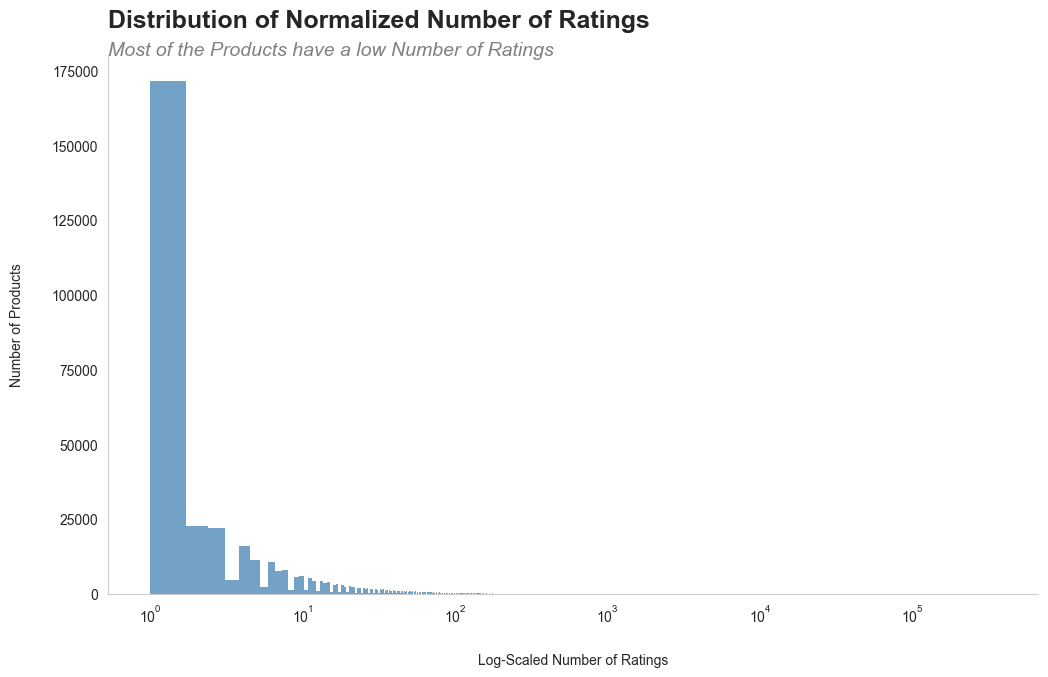

In [176]:
plt.figure(figsize=(12, 7))
sns.histplot(combined_df['no_of_ratings_norm'] + 1, bins=500000, kde=False, color='steelblue')
plt.xscale('log')

# Remove grid lines
plt.grid(False)

# Adjust main title properties and position
plt.title('Distribution of Normalized Number of Ratings', loc='left', fontsize=18, fontweight='bold', pad=20)

# Add subtitle using text method
ax = plt.gca()
ax.text(0.0002, 1, 'Most of the Products have a low Number of Ratings ', transform=ax.transAxes, fontsize=14, color='grey', style='italic')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Log-Scaled Number of Ratings', labelpad=20)
plt.ylabel('Number of Products', labelpad=20)
plt.show()


The histogram abvoe displays a log-scaled distribution of normalized number of ratings for products. This type of visualization is useful for understanding the spread and frequency of product ratings when there is a wide range of values, particularly if there are many more products with a low number of ratings, which is common.

Here are some insights that could be derived from such a plot:

- **High Frequency of Low Ratings:** The tall bar at the left end of the histogram indicates that a very high number of products have a low number of ratings. This is typical of many e-commerce platforms where there are a large number of products, but only a few gain significant attention and ratings from consumers.

- **Exponential Drop-off:** The rapid decrease in the number of products as the number of ratings increases (moving right on the x-axis) suggests that fewer products manage to achieve a high number of ratings. This might reflect consumer behavior where only certain products capture wide interest or are promoted more effectively.

- **Logarithmic Scale:** The use of a logarithmic scale on the x-axis helps to more easily visualize and interpret data that spans several orders of magnitude. It suggests that the distribution of ratings is heavily skewed, with very few products achieving extremely high ratings.

- **Long Tail in Product Ratings:** The "long tail" pattern observed—where a large number of products have a small number of ratings—might inform strategies to encourage more ratings, such as through review incentives or enhanced product visibility.

In [177]:
# To delete the 'no_of_ratings' column from the DataFrame
combined_df.drop('no_of_ratings', axis=1, inplace=True)

# To rename the 'no_of_ratings_norm' column to 'no_of_ratings'
combined_df.rename(columns={'no_of_ratings_norm': 'no_of_ratings'}, inplace=True)


In [178]:
# Select rows with the top values in the "no_of_ratings" column
top_high_ratings = combined_df.nlargest(5, 'no_of_ratings')

# Display these rows
display(top_high_ratings)

,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
31672,AmazonBasics AAA Performance Alkaline Non-rech...,"tv, audio & cameras",All Electronics,4.40,AmazonBasics,10.21,7.25,28.99,True,1,351441.00
34429,AmazonBasics AA Performance Alkaline Non-Recha...,"tv, audio & cameras",All Electronics,4.50,AmazonBasics,16.97,10.54,37.89,True,1,336487.00
1743,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,4.10,Pigeon,6.19,2.26,63.49,True,1,274505.00
338122,Gildan Men's White Crew T-Shirt Multipack,men's clothing,Innerwear,4.60,Gildan,55.56,55.56,0.00,True,1,219589.00
296217,TOZO T6 True Wireless Earbuds Bluetooth Headph...,"tv, audio & cameras",Headphones,4.40,TOZO,113.48,68.08,40.01,True,1,207261.00


After that, let´s do the same for the Actual Price and visualize the distribution:

#### **Actual Price**

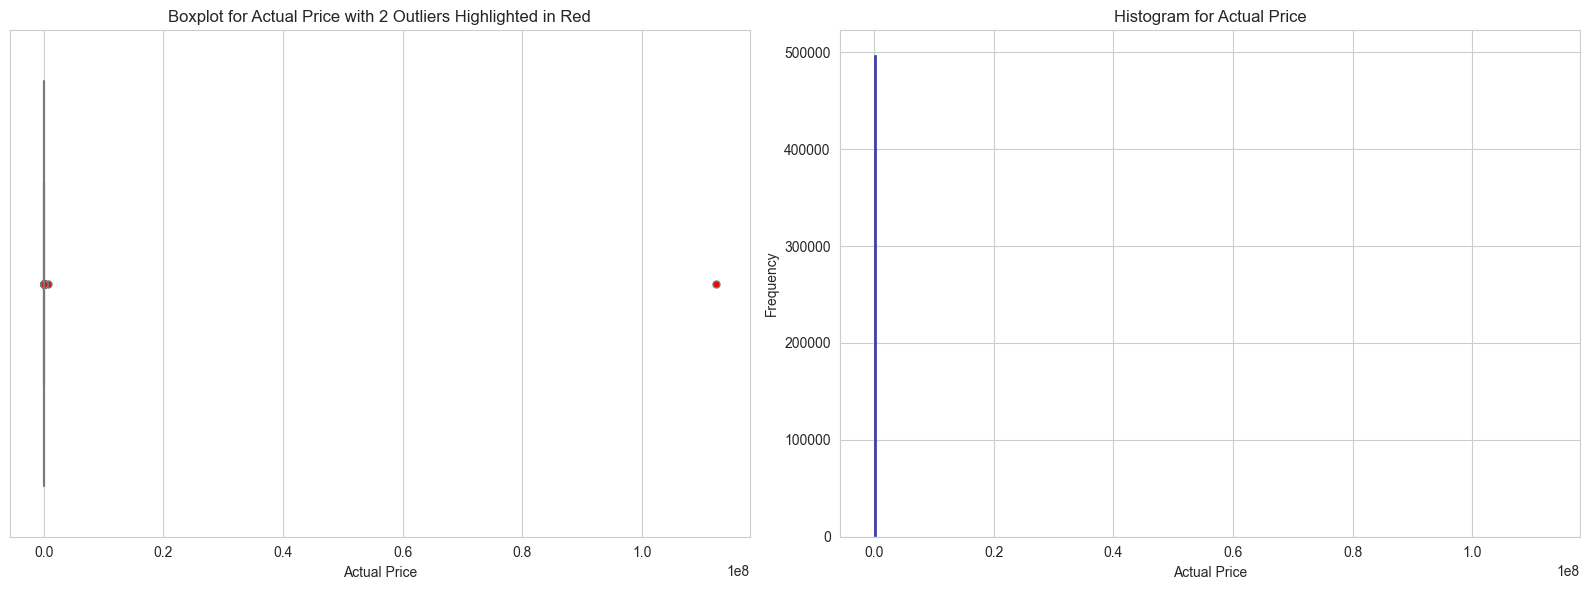

In [179]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['actual_price_eur'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])

# Extract the outliers
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)

# Set labels and title of first subplot
axes[0].set_xlabel('Actual Price')
axes[0].set_title(f'Boxplot for Actual Price with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='actual_price_eur', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Actual Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


**Boxplot for Actual Price with 2 Outliers Highlighted in Red:**

- The boxplot on the left is designed to show the distribution of 'Actual Price'. The main components of the boxplot (the box and whiskers) seem to be extremely narrow and close to zero, which indicates that the majority of the actual price data points are clustered within a small range near zero.
- There are two data points highlighted in red, which are identified as outliers. These outliers are significant as they lie well outside the range of the majority of the data.

**Histogram for Actual Price:**

- The histogram on the right is intended to display the frequency distribution of 'Actual Price'. It should show how often each price range occurs in the dataset.
- There appears to be a single bar on the histogram close to zero, which suggests that nearly all the actual price values are concentrated in the lower end of the price spectrum.
- The x-axis is labeled 'Actual Price' and is scaled logarithmically, as evidenced by the '1e8' marking, which stands for 100,000,000. This scale is often used to better visualize data that spans several orders of magnitude.
- The y-axis is labeled 'Frequency', but no bars are visible apart from the one close to zero. This could mean that the frequency of the higher prices is too low to be visible on the scale used or that the majority of the data falls into the first bin of the histogram.

**Potential Data Characteristics:**

- The dataset likely has a very large range with a concentration of low-value items and very few high-value items. This is typical for datasets where the majority of items are relatively inexpensive, with a few premium or luxury items priced much higher.
- The data is highly skewed, with outliers that could represent special high-value products or errors in the data.

In [180]:
# Select rows with the top values in the "actual_price_eur" column
top_high_ratings = combined_df.nlargest(5, 'actual_price_eur')

# Display these rows
display(top_high_ratings)


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
280092,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,2.00,Marutivilla,112352027.26,6.68,100.00,False,1,1.00
210536,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,3.20,Clovia,693211.89,7.81,100.00,False,3,1.33
458701,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.00,Samsung,18100.03,14185.75,21.63,False,1,10.00
356033,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,accessories,Jewellery,0.00,USPTO,13618.43,4607.67,66.17,False,21,0.00
356051,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,kids' fashion,Kids' Fashion,0.00,USPTO,13618.43,4607.67,66.17,False,21,0.00


As a result, we remove them:

In [181]:
# Removing rows with specific actual_price values
combined_df = combined_df[~combined_df['actual_price_eur'].isin([112352027.26, 693211.89])]


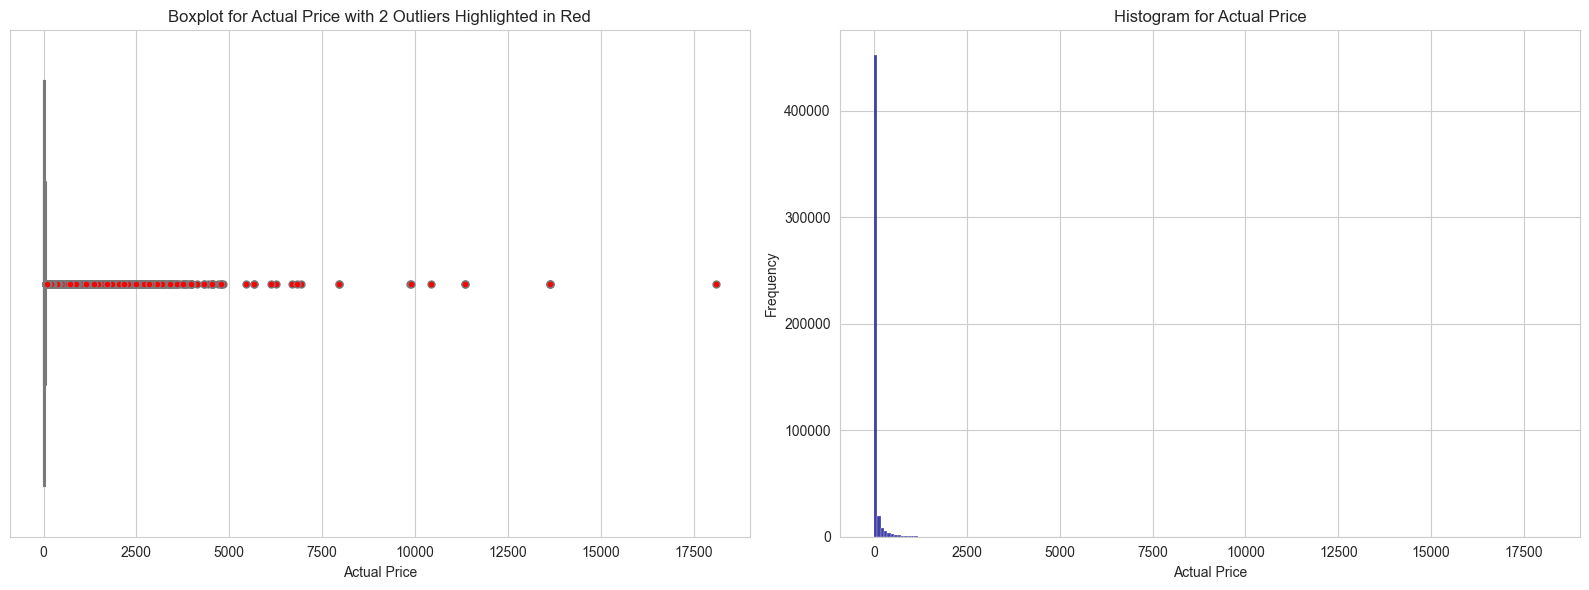

In [182]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['actual_price_eur'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])

# Extract the outliers
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)

axes[0].set_xlabel('Actual Price')
axes[0].set_title(f'Boxplot for Actual Price with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='actual_price_eur', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Actual Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()




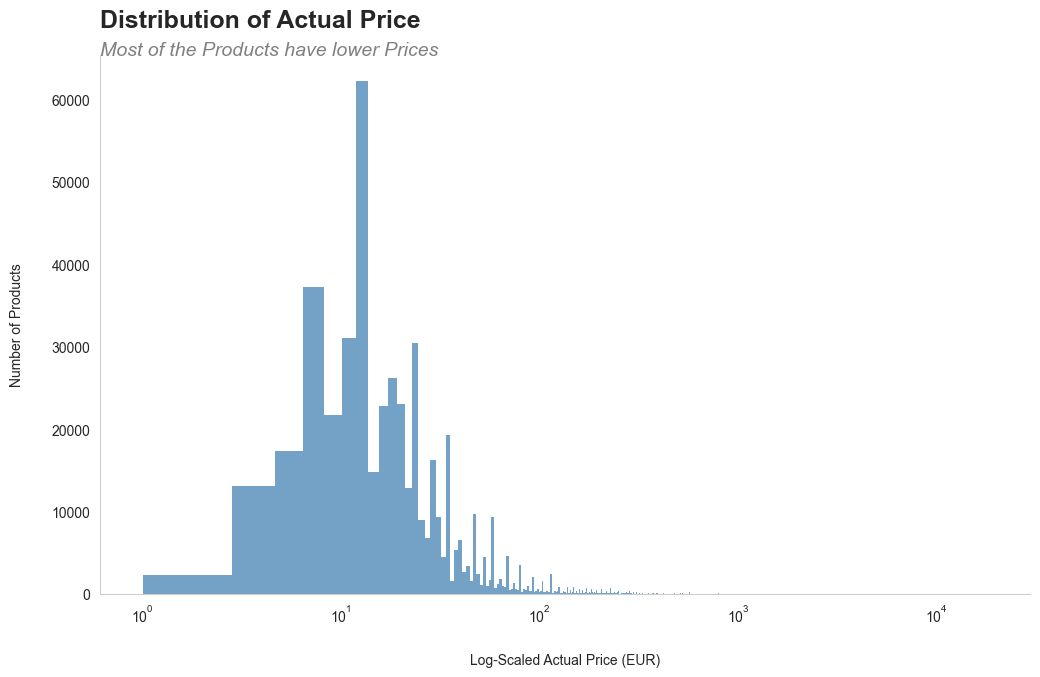

In [198]:
plt.figure(figsize=(12, 7))
sns.histplot(combined_df['actual_price_eur'] + 1, bins=10000, kde=False, color='steelblue')
plt.xscale('log')

# Remove grid lines
plt.grid(False)

# Adjust main title properties and position
plt.title('Distribution of Actual Price', loc='left', fontsize=18, fontweight='bold', pad=20)

# Add subtitle using text method
ax = plt.gca()
ax.text(0.0002, 1, 'Most of the Products have lower Prices ', transform=ax.transAxes, fontsize=14, color='grey', style='italic')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Log-Scaled Actual Price (EUR)', labelpad=20)
plt.ylabel('Number of Products', labelpad=20)
plt.show()


The histogram you uploaded illustrates the distribution of the actual price of products on a logarithmic scale. This visualization is effective for displaying data across a wide range of values and is particularly useful for understanding how the prices of products are spread out in an e-commerce setting.

Key insights from the histogram include:

- **Price Concentration:** There is a clear concentration of products at the lower end of the price spectrum, as evidenced by the tall bars on the left. This indicates that most products are priced at a lower cost, which is typical for mass-market items.

- **Long Tail Distribution:** The 'long tail' to the right suggests that as the price increases, fewer products are available at those higher price points. This is expected as premium or luxury items tend to be less common.

- **Scale Interpretation:** The use of a log scale on the x-axis (Log-Scaled Actual Price) helps in handling wide-ranging price data and allows us to better visualize the distribution that would otherwise be dominated by a large number of low-priced products.

- **Strategic Pricing:** For retailers, this distribution suggests that the bulk of the market competition may be at the lower end of the price scale. Strategies might include focusing on volume sales in this range or differentiating higher-priced items.

- **Consumer Spending Patterns:** The histogram can reflect consumer spending behavior, with a preference for more affordably priced products. Products within the most populated price ranges could represent the 'sweet spot' for pricing strategies.

In [199]:
# Calculate the median and IQR (Interquartile Range)
median = combined_df['actual_price_eur'].median()  # Calculate the median of the actual prices
q1 = combined_df['actual_price_eur'].quantile(0.25)  # Calculate the first quartile (25th percentile)
q3 = combined_df['actual_price_eur'].quantile(0.75)  # Calculate the third quartile (75th percentile)
iqr = q3 - q1  # Calculate the Interquartile Range (IQR)

# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

# Identify outliers
outliers = combined_df[(combined_df['actual_price_eur'] < (median - threshold)) | (combined_df['actual_price_eur'] > (median + threshold))]

# Create a list of outlier values
outlier_values = outliers['actual_price_eur'].values.tolist()

# Count the number of outliers
num_outliers = len(outlier_values)

# Display the number of outliers and the list of outlier values
print(f'Number of Outliers: {num_outliers}')

# Calculate the total number of values in the column
total_values = len(combined_df['actual_price_eur'])

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the percentage of outliers
outlier_percentage = (num_outliers / total_values) * 100

# Display the percentage of outliers
print(f'Percentage of Outliers: {outlier_percentage:.2f}%')



Number of Outliers: 77873
Percentage of Outliers: 15.64%


In [200]:
# Determine the boundaries for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Marking outliers in a new column
combined_df['outlier_price'] = combined_df['actual_price_eur'].apply(lambda x: 'True' if x < lower_bound or x > upper_bound else 'False')

# Display the first few rows of the dataframe to check the newly added 'outlier_price' column
display(combined_df.head())


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings,outlier_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,True
1,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,All Appliances,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,True
2,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Heating & Cooling Appliances,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,True
3,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Kitchen & Home Appliances,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,True
4,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,LG,862.39,527.60,38.82,True,4,737.00,True


#### **Distribution of Outliers in Main Categories**
Let`s see in which main categories contain outliers:

accessories               31.43
tv, audio & cameras       18.00
men's shoes               14.13
appliances                11.97
stores                     8.09
women's clothing           5.99
bags & luggage             2.02
sports & fitness           1.67
men's clothing             1.44
home & kitchen             1.12
industrial supplies        0.88
women's shoes              0.69
toys & baby products       0.60
kids' fashion              0.53
car & motorbike            0.51
beauty & health            0.46
music                      0.38
pet supplies               0.06
grocery & gourmet foods    0.03
home, kitchen, pets        0.01
Name: main_category, dtype: float64


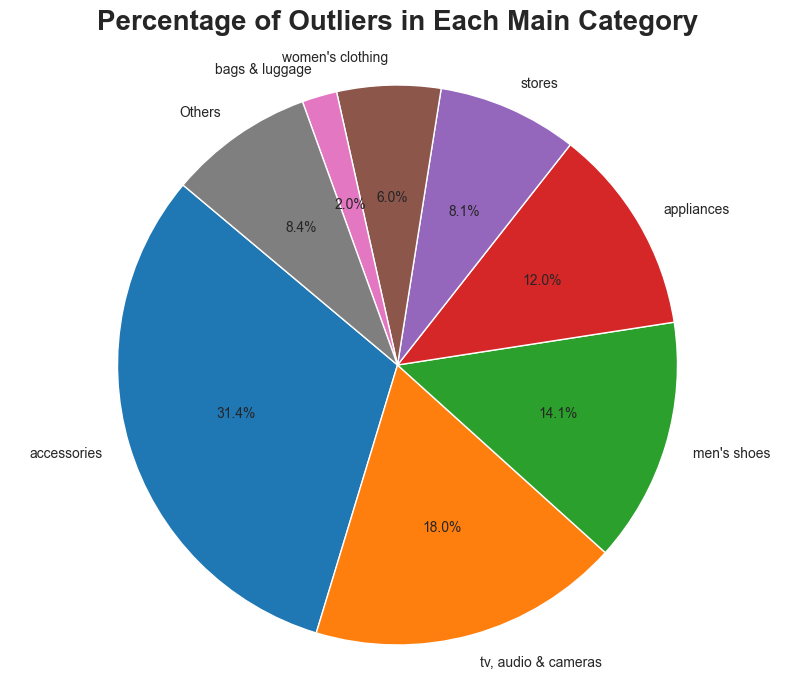

In [201]:
# Calculate the number of outliers in each main_category
outliers_count_per_category = outliers['main_category'].value_counts()

# Calculate the total number of outliers
num_outliers = outliers_count_per_category.sum()

# Calculate the percentage of outliers in each main_category
outliers_percentage_per_category = (outliers_count_per_category / num_outliers) * 100

# Display the percentage of outliers in each main_category
print(outliers_percentage_per_category)

# Consolidating categories below 5% into 'Others'
threshold = 2  # Percentage
# Identify small categories that are below the threshold
small_categories = outliers_percentage_per_category[outliers_percentage_per_category < threshold]
# Identify big categories that meet or exceed the threshold
big_categories = outliers_percentage_per_category[outliers_percentage_per_category >= threshold]
# Sum up the percentages of the small categories to create an 'Others' category
others_percentage = small_categories.sum()
# If there is a significant percentage to be grouped into 'Others', add it to the big categories
if others_percentage > 0:
    big_categories['Others'] = others_percentage

# Create a pie plot
plt.figure(figsize=(10, 8))  # Set the figure size
# Plot the data, label each segment, format the percentage, and set the starting angle
plt.pie(big_categories, labels=big_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Outliers in Each Main Category', fontweight="bold", fontsize=20, pad=20)  # Title of the plot
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()  # Display the plot



The list above and the following pie chart represents the distribution of outliers within broader categories of the dataset. These figures can offer valuable insights:

- **Accessories (31.43%):** This category has the highest percentage of outliers, which could mean that within accessories, there is a vast range of product qualities and prices. High-end luxury items, limited editions, or rare finds could be skewing the data here.

- **TV, Audio & Cameras (18.00%):** With a significant percentage of outliers, this category likely includes high-tech or premium branded products that carry much higher price tags or features compared to the median product range.

- **Men's Shoes (14.13%):** There's a substantial variety within men's shoes that may include designer brands or specialized footwear that are outliers in terms of price or design.

- **Appliances (11.97%):** Large or smart appliances might be driving the higher outlier percentage, suggesting that there are products with prices well above the norm due to brand, functionality, or innovation.

- **Stores (8.09%):** This could refer to a classification used for various physical or online storefronts, indicating differences in pricing strategies or product offerings.

- **Women's Clothing (5.99%):** The lower outlier percentage compared to men's shoes suggests that women's clothing might have fewer extreme variations in pricing, possibly due to a more competitive or standardized market.

- **Low Variability Categories:** Categories like 'Grocery & Gourmet Foods' and 'Home, Kitchen, Pets' have very low percentages of outliers, which could indicate these markets are more price-sensitive or standardized.

#### **Distribution of Outliers in Sub Categories**

When we have a look at them by subcategory we see that the most outliers are contained in Gold, Diamond Jewellery which is quite plausible, in the other categories there share is pretty low.

Gold & Diamond Jewellery       15.98
Sportswear                      5.16
Casual Shoes                    5.13
Security Cameras                5.09
Ethnic Wear                     4.66
Watches                         4.66
Formal Shoes                    4.61
Sports Shoes                    4.40
Jewellery                       3.48
Heating & Cooling Appliances    3.30
Cameras                         3.14
Kitchen & Home Appliances       2.84
All Appliances                  2.82
Handbags & Clutches             2.75
Bags & Luggage                  2.67
All Electronics                 2.15
Men's Fashion                   1.97
Camera Accessories              1.78
Speakers                        1.73
Headphones                      1.70
Name: sub_category, dtype: float64


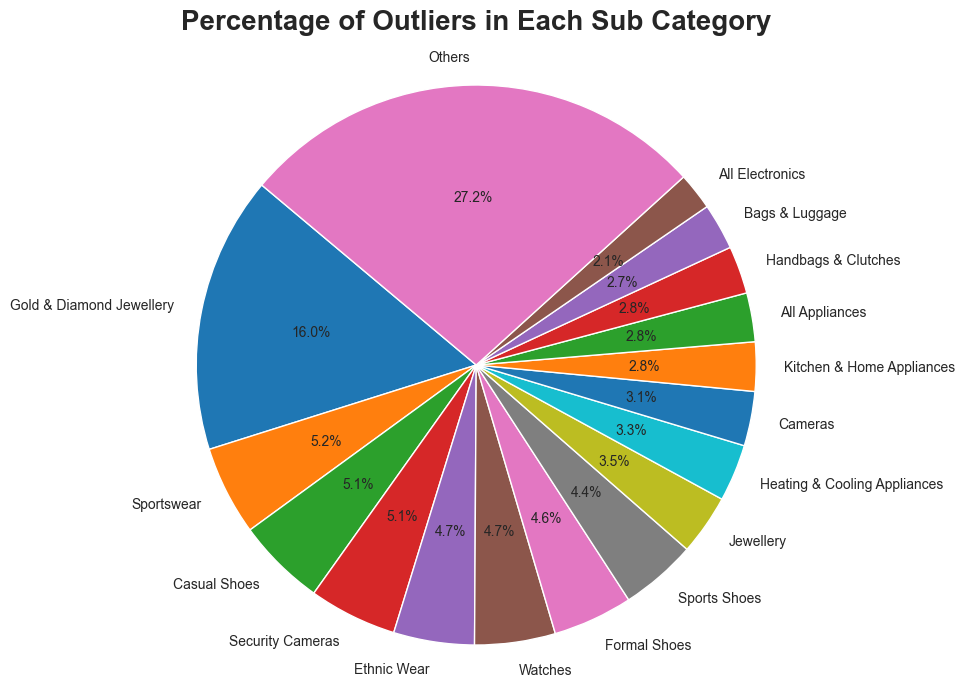

In [202]:
# Calculate the number of outliers in each main_category
outliers_count_per_category = outliers['sub_category'].value_counts()

# Calculate the total number of outliers
num_outliers = outliers_count_per_category.sum()

# Calculate the percentage of outliers in each main_category
outliers_percentage_per_category = (outliers_count_per_category / num_outliers) * 100

# Display the percentage of outliers in each main_category
print(outliers_percentage_per_category.head(20))

# Consolidating categories below 5% into 'Others'
threshold = 2  # Percentage
# Identify small categories that are below the threshold
small_categories = outliers_percentage_per_category[outliers_percentage_per_category < threshold]
# Identify big categories that meet or exceed the threshold
big_categories = outliers_percentage_per_category[outliers_percentage_per_category >= threshold]
# Sum up the percentages of the small categories to create an 'Others' category
others_percentage = small_categories.sum()
# If there is a significant percentage to be grouped into 'Others', add it to the big categories
if others_percentage > 0:
    big_categories['Others'] = others_percentage

# Create a pie plot
plt.figure(figsize=(10, 8))  # Set the figure size
# Plot the data, label each segment, format the percentage, and set the starting angle
plt.pie(big_categories, labels=big_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Outliers in Each Sub Category', fontweight="bold", pad=20, fontsize=20)  # Title of the plot
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()  # Display the plot



The table above and the pie chart in the following is a breakdown of the percentages of outliers within various product subcategories. Here's an interpretation of these figures:

- **Gold & Diamond Jewellery (15.98%):** This subcategory has the highest percentage of outliers, which could indicate significant price variance or product value. This might reflect items that are very expensive compared to the rest of the products in the dataset, or it could show a diversity in the range of jewelry offerings.

- **Apparel and Accessories (Sportswear, Casual Shoes, Ethnic Wear, etc.):** These categories, which include items like Sportswear, Casual Shoes, and Ethnic Wear, have moderate outlier percentages ranging from around 4% to 5%. This suggests a decent amount of variability, possibly due to branded or designer items that stand out price-wise from standard products.

- **Electronics and Appliances:** Security Cameras, Heating & Cooling Appliances, and Cameras have outliers in the range of 3% to 5%. This indicates that there are some products with prices or features that are quite different from the general selection.

- **Lower Variability Categories:** The subcategories like 'All Electronics,' 'Men's Fashion,' and 'Camera Accessories' have less than 2% of outliers, implying that these groups are more homogeneous in nature, with products priced closely to one another.

- **Interpretation of Lower Percentages:** Lower percentages, like those for 'Headphones' and 'Speakers', suggest that while there are outliers, they are not as prevalent. This could be due to a more standardized market or tighter price competition.

**Potential Analysis Actions:**

- **Gold & Diamond Jewellery:** Given its high percentage, further analysis could be conducted to determine if the outliers are due to a few very high-value items or a broader range of prices.
- **Sportswear and Shoes:** These categories might include premium and luxury items causing the higher percentages of outliers.
- **Electronics and Appliances:** New technology, brand value, or advanced features could contribute to the price variability leading to outliers in these subcategories.
- **Business Implications:** The analysis of outliers could inform inventory management, pricing strategies, and marketing efforts. High outlier percentages could indicate a need for differentiated sales approaches for premium products.

- **Data Quality Check:** It's also worth considering if the outliers are genuine or if they result from data entry errors, especially in high-value categories like 'Gold & Diamond Jewellery'.

In conclusion we can state, that the distribution of outliers over all subcategories seems to be realistic and understandable. As a result, we decide to keep them.

In [203]:
# Filter the DataFrame for a specific main_category, for example 'Electronics'
specific_category_outliers = outliers[outliers['sub_category'] == 'Sportswear'].sort_values(by='actual_price_eur', ascending=False)

# Display the first few rows of this specific category
display(specific_category_outliers.head(2))

# Filter the DataFrame for a specific main_category, for example 'Electronics'
specific_category_outliers = outliers[outliers['sub_category'] == 'Gold & Diamond Jewellery'].sort_values(by='actual_price_eur', ascending=False)

# Display the first few rows of this specific category
display(specific_category_outliers.head(2))

# Filter the DataFrame for a specific main_category, for example 'Electronics'
specific_category_outliers = outliers[outliers['sub_category'] == 'Casual Shoes'].sort_values(by='actual_price_eur', ascending=False)


# Display the first few rows of this specific category
display(specific_category_outliers.head(2))




,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
374943,Nike Zoom Freak 1,stores,Sportswear,4.60,Nike,725.29,725.29,0.00,False,3,10.67
444719,Nike Big Kids AIR Vapormax Flyknit 3 Running S...,stores,Sportswear,4.90,Nike,725.09,725.09,0.00,False,1,29.00


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
284519,Sri Jagdamba Pearls 10 Gm 24kt (999) Yellow Go...,accessories,Gold & Diamond Jewellery,4.40,Sri,7947.49,752.47,90.53,False,2,2.00
239958,PC Jeweller 18k (750) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,0.00,PC Jeweller,6248.61,5311.32,15.00,False,5198,0.00


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
172966,Nike Air Jordan 1 Mid Mens Basketball Shoes 55...,men's shoes,Casual Shoes,3.60,Nike,714.90,714.90,0.00,False,3,2.00
171826,Men's Jordan 9 Retro Fire Red White/Fire Red-C...,men's shoes,Casual Shoes,5.00,Men's Jordan,571.92,571.92,0.00,False,1,1.00


In [204]:
# Convert the data type of the 'brand' column to categorical
combined_df['brand'] = combined_df['brand'].astype('category')
combined_df['outlier_price'] = combined_df['outlier_price'].astype('bool')

# Drop counts column
combined_df.drop('counts', axis=1, inplace=True)

# Show preprocessed summary and info
print(combined_df.info())
summary = combined_df.describe()
display(summary)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497773 entries, 0 to 497774
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 497773 non-null  category
 1   main_category        497773 non-null  category
 2   sub_category         497773 non-null  category
 3   ratings              497773 non-null  float64 
 4   brand                497773 non-null  category
 5   actual_price_eur     497773 non-null  float64 
 6   discount_price_eur   497773 non-null  float64 
 7   discount_percentage  497773 non-null  float64 
 8   outlier_no_ratings   497773 non-null  bool    
 9   no_of_ratings        497773 non-null  float64 
 10  outlier_price        497773 non-null  bool    
dtypes: bool(2), category(4), float64(5)
memory usage: 40.7 MB
None


,ratings,actual_price_eur,discount_price_eur,discount_percentage,no_of_ratings
count,497773.00,497773.00,497773.00,497773.00,497773.00
mean,2.79,48.34,30.39,47.11,266.95
std,1.81,144.62,107.56,23.74,2356.56
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,11.24,4.41,30.80,0.00
50%,3.60,18.10,7.71,50.09,4.20
75%,4.10,34.03,15.99,65.66,44.00
max,5.00,18100.03,14185.75,99.90,351441.00


In [205]:
# Save cleaned and preprocessed df
combined_df.to_csv('preprocessed_df.csv', index=False)
